In [2]:
import json
import matplotlib.pyplot as plt
import os, sys

In [73]:
# GPT-4 with nudges

wn_p_lf_1 = open("../logs/loopy_2023_08_25_13_54_09/final_rechecked_re_filtered.json", "r", encoding="utf-8")
wn_p_l = json.load(wn_p_lf_1)
wn_p_l = wn_p_l["logs"]
wn_p_lf_1.close()
wn_p_lf_2 = open("../logs/loopy_2023_08_13_23_52_42/final_rechecked_rechecked_re_filtered.json", "r", encoding="utf-8")
wn_p_l_2 = json.load(wn_p_lf_2)
wn_p_l_2 = wn_p_l_2["logs"]
wn_p_lf_2.close()


wn_success = {}
wn_success_with_prune = {}
to_recheck = {}
wn = {}
# for i, c5 in enumerate(wn_p_l):
#     succeeded = False
#     if "completions" in c5:
#         for completion in c5["completions"]:
#             if completion["success"] == True:
#                 succeeded = True
#                 wn_success[c5["file"]] = completion["success"]
#                 break
#             if "success_after_prune" in completion:
#                 if completion["success_after_prune"] == True:
#                     succeeded = True
#                     break
#     if "checker_output" in c5:
#         if c5["checker_output"] == True:
#             succeeded = True
#     if "checker_output_after_combine_and_prune" in c5:
#         if c5["checker_output_after_combine_and_prune"] == True:
#             succeeded = True
#             wn_success_with_prune[c5["file"]] = c5["checker_output_after_combine_and_prune"]
#             # continue
#     if succeeded:
#         wn[c5["file"]] = True

# for i, c10 in enumerate(wn_p_l_2):
#     succeeded = False
#     if "completions" in c10:
#         for completion in c10["completions"]:
#             if completion["success"] == True:
#                 succeeded = True
#                 wn_success[c10["file"]] = completion["success"]
#                 break
#             if "success_after_prune" in completion:
#                 if completion["success_after_prune"] == True:
#                     succeeded = True
#                     break
#     if "checker_output" in c10:
#         if c10["checker_output"] == True:
#             succeeded = True
#     if "checker_output_after_combine_and_prune" in c10:
#         if c10["checker_output_after_combine_and_prune"] == True:
#             succeeded = True
#             wn_success_with_prune[c10["file"]] = c10["checker_output_after_combine_and_prune"]
#             # continue
#     if succeeded:
#         wn[c10["file"]] = True

for c5, c10 in zip(wn_p_l, wn_p_l_2):
    assert c5["file"] == c10["file"]
    if "completions" not in c5 or "completions" not in c10:
        print(c5["file"])
        print(c10["file"])
        continue
    new_completions = c5["completions"] + c10["completions"]
    if any([completion["success"] for completion in new_completions]):
        wn_success[c5["file"]] = True
        continue
    else:
        if "checker_output_after_combine_and_prune" in c5 and c5["checker_output_after_combine_and_prune"] == True:
            wn_success_with_prune[c5["file"]] = c5["checker_output_after_combine_and_prune"]
            continue
        if "checker_output_after_combine_and_prune" in c10 and c10["checker_output_after_combine_and_prune"] == True:
            wn_success_with_prune[c10["file"]] = c10["checker_output_after_combine_and_prune"]
            continue
    # success = False
    # if "completions" in c5:
    #     if any([completion["success"] for completion in c5["completions"]]):
    #         wn_success[c5["file"]] = True
    # if "completions" in c10:
    #     if any([completion["success"] for completion in c10["completions"]]):
    #         wn_success[c10["file"]] = True
    # else:
    #     if "checker_output_after_combine_and_prune" in c5 and c5["checker_output_after_combine_and_prune"] == True:
    #         wn_success_with_prune[c5["file"]] = c5["checker_output_after_combine_and_prune"]
    #     if "checker_output_after_combine_and_prune" in c10 and c10["checker_output_after_combine_and_prune"] == True:
    #         wn_success_with_prune[c10["file"]] = c10["checker_output_after_combine_and_prune"]

../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loops/sum01_true-unreach-call_true-termination.i.annot.c
../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loops/sum01_true-unreach-call_true-termination.i.annot.c


In [74]:
len(wn)

0

In [75]:
len(wn_success), len(wn_success_with_prune)

(213, 61)

In [61]:
len(set(wn_success.keys()).intersection(set(wn_success_with_prune.keys())))

0

In [10]:
wn_success, wn_success_with_prune = list(wn_success.keys()), list(wn_success_with_prune.keys())

In [9]:
wn_success_with_qual_analysis = [
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loops/while_infinite_loop_1.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loops/while_infinite_loop_2.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loop-acceleration/overflow_1-1.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loop-invariants/even.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loop-invariants/mod4.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loop-invariants/odd.c",
]
wn_success_with_qual_analysis_with_prune = [
    "../new_benchmarks/original_benchmarks/accelerating_invariant_generation/crafted/overflow_safe1.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loops/sum03-2.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loops-crafted-1/vnew2.c",
    "../new_benchmarks/original_benchmarks/sv-benchmarks/loop-lit/ddlm2013.c",
    "../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-lit/ddlm2013_true-unreach-call.c"
]

In [14]:
# final_wn_success = wn_success + wn_success_with_qual_analysis
# final_wn_success_with_prune = wn_success_with_prune + wn_success_with_qual_analysis_with_prune

In [62]:
gpt_35_log_file = open("../logs/loopy_2023_09_24_21_35_45/final.json", "r", encoding="utf-8")
gpt_35_logs = json.load(gpt_35_log_file)
gpt_35_log_file.close()

In [63]:
gpt_35_success = []
gpt_35_success_with_prune = []

for c in gpt_35_logs["logs"]:
    if "completions" in c:
        for completion in c["completions"]:
            if completion["success"] == True:
                gpt_35_success.append(c["file"])
                break
            if completion["success_after_prune"] == True:
                gpt_35_success_with_prune.append(c["file"])
                break


In [10]:
codellama_file = open("../paper_logs/codellama/old_mix/loopy_2023_09_25_08_57_18/final.json", "r", encoding="utf-8")
codellama_logs = json.load(codellama_file)
codellama_file.close()

In [28]:
codellama_success = {}
codellama_success_with_prune = {}

for c in codellama_logs["logs"]:
    if "completions" in c:
        for completion in c["completions"]:
            if completion["success"] == True:
                codellama_success[(c["file"][0])] = completion["success"]
                break
            if completion["success_after_prune"] == True:
                codellama_success_with_prune[(c["file"][0])] = completion["success_after_prune"]
                break
        if "checker_output" in c and c["checker_output"] == True:
            codellama_success_with_prune[(c["file"][0])] = c["checker_output"]
            continue
        if "checker_output_after_combine_and_prune" in c and c["checker_output_after_combine_and_prune"] == True:
            codellama_success_with_prune[(c["file"][0])] = c["checker_output_after_combine_and_prune"]

In [29]:
len(codellama_success), len(codellama_success_with_prune)

(65, 171)

In [66]:
len(wn_success), len(gpt_35_success), len(codellama_success),

(213, 62, 65)

In [37]:
codellama_code2inv_file = open("../logs/loopy_2023_10_22_01_14_08/final.json", "r", encoding="utf-8")
codellama_code2inv_logs = json.load(codellama_code2inv_file)
codellama_code2inv_file.close()

gpt_35_code2inv_file = open("../logs/loopy_2023_10_21_23_17_27/final.json", "r", encoding="utf-8")
gpt_35_code2inv_logs = json.load(gpt_35_code2inv_file)
gpt_35_code2inv_file.close()

gpt_4_code2inv_file = open("../logs/loopy_2023_10_03_02_16_01/final.json", "r", encoding="utf-8")
gpt_4_code2inv_logs = json.load(gpt_4_code2inv_file)
gpt_4_code2inv_file.close()

In [40]:
cl_c2_success = {}
gpt_35_c2_success = {}
gpt_4_c2_success = {}

for c in codellama_code2inv_logs["logs"]:
    if len(c["log"]) > 1 and "completions" in c["log"][1]:
        for completion in c["log"][1]["completions"]:
            if completion["success"] == True:
                cl_c2_success[c["file"]] = completion["success"]
                break

for c in gpt_35_code2inv_logs["logs"]:
    if len(c["log"]) > 1 and "completions" in c["log"][1]:
        for completion in c["log"][1]["completions"]:
            if completion["success"] == True:
                gpt_35_c2_success[c["file"]] = completion["success"]
                break

for c in gpt_4_code2inv_logs["logs"]:
    if "completions" in c:
        for completion in c["completions"]:
            if completion["success"] == True:
                gpt_4_c2_success[c["file"]] = completion["success"]
                break

In [42]:
len(cl_c2_success), len(gpt_35_c2_success), len(gpt_4_c2_success)

(41, 51, 70)

In [44]:
gpt4_num = len(wn_success) + len(gpt_4_c2_success)
gpt4_num

247

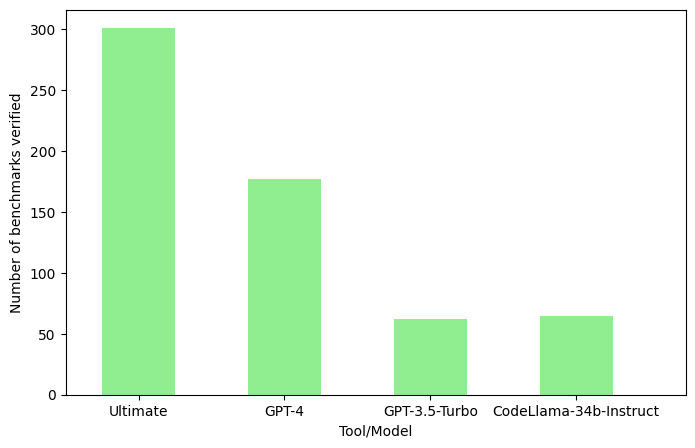

In [60]:
fig, ax = plt.subplots(figsize=(8, 5))
# ax.set_title("Number of benchmarks verified")
ax.set_xlabel("Tool/Model")
ax.set_ylabel("Number of benchmarks verified")

ax.bar(1, 301, color="lightgreen", width=0.5,)

ax.bar(2, len(wn_success), color="lightgreen", width=0.5,)

ax.bar(3, len(gpt_35_success), color="lightgreen", width=0.5,)

ax.bar(4, len(codellama_success), color="lightgreen", width=0.5)

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(["Ultimate", "GPT-4", "GPT-3.5-Turbo", "CodeLlama-34b-Instruct"])
ax.set_xlim(0.5, 4.75)
plt.savefig("graphs/pass_at_15_models_vs_ultimate.png")
plt.show()

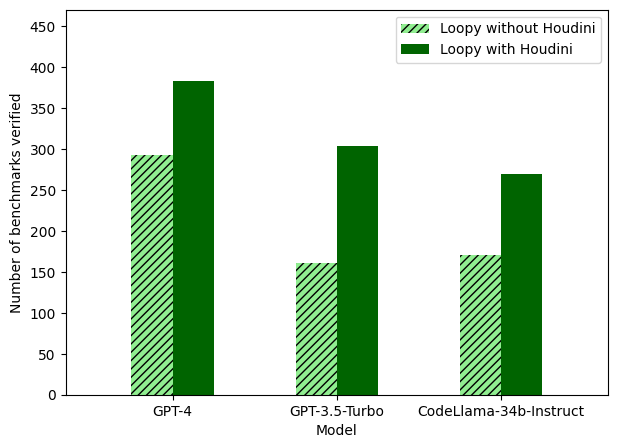

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlabel("Model")
ax.set_ylabel("Number of benchmarks verified")

ax.bar(0.875, 293, color="lightgreen", width=0.25, label="Loopy without Houdini", hatch="////")
ax.bar(1.125, 383, color="darkgreen", width=0.25, label="Loopy with Houdini")

ax.bar(1.875, 161, color="lightgreen", width=0.25, label="Loopy without Houdini", hatch="////")
ax.bar(2.125, 304, color="darkgreen", width=0.25, label="Loopy with Houdini")

ax.bar(2.875, 171, color="lightgreen", width=0.25, label="Loopy without Houdini", hatch="////")
ax.bar(3.125, 269, color="darkgreen", width=0.25, label="Loopy with Houdini")

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["GPT-4", "GPT-3.5-Turbo", "CodeLlama-34b-Instruct"])
ax.set_xlim(0.35, 3.65)
ax.set_ylim(0, 470)
ax.set_yticks(range(0, 470, 50))
ax.legend(["Loopy without Houdini", "Loopy with Houdini"])
plt.savefig("graphs/model_comparison.png", bbox_inches="tight")
plt.show()

In [14]:
len(wn)

286

In [11]:
wn = (final_wn_success) + (final_wn_success_with_prune)
gpt_35 = (gpt_35_success) + (gpt_35_success_with_prune)
codellama = (codellama_success) + (codellama_success_with_prune)

In [28]:
gpt_35 = [x.replace("../data/", "../") for x in gpt_35]
codellama = [x.replace("../data/", "../") for x in codellama]

In [31]:
len(set(wn).intersection(set(gpt_35)))

203

In [12]:
ultimate_success_file = open("ultimate_success.txt", "r", encoding="utf-8")
ultimate_success = ultimate_success_file.read().split("\n")
ultimate_success_file.close()

In [33]:
from matplotlib_venn import venn2_unweighted, venn3_unweighted

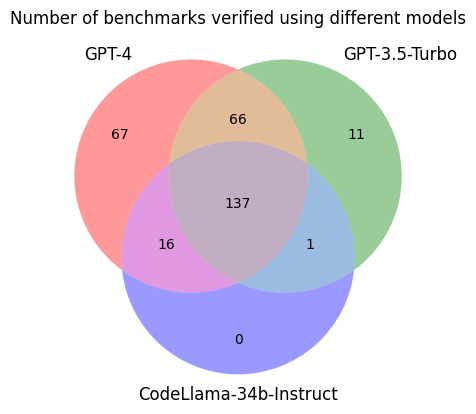

In [30]:
set_wn, set_gpt_35, set_codellama = set(wn), set(gpt_35), set(codellama)
venn3_unweighted([set_wn, set_gpt_35, set_codellama], ("GPT-4", "GPT-3.5-Turbo", "CodeLlama-34b-Instruct"))
plt.title("Number of benchmarks verified using different models")
plt.savefig("graphs/llm_comparison_venn.png")
plt.show()

In [40]:
set_wn, set_gpt_35, set_codellama, set_ultimate = set(wn), set(gpt_35), set(codellama), set(ultimate_success)

In [34]:
wn_set = set(wn.keys())

In [35]:
ultimate_set = set(ultimate_success)

In [38]:
wn_set - ultimate_set

{'../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/invgen/rajamani_1.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-new/count_by_2_true-unreach-call_true-termination.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loops/count_up_down_true-unreach-call_true-termination.i.annot.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/02.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/05.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/30.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/cav/05.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/cav/gulv.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/cav/pldi082_unbounded.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/crafted/phases_safe1.c',
 '../new_benchmarks/original_benchmar

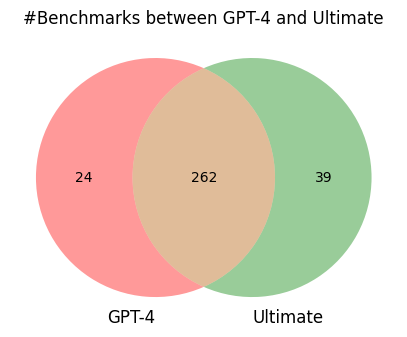

In [51]:
_ = plt.figure(figsize=(5, 5))
venn2_unweighted([set_wn, set_ultimate], ("GPT-4", "Ultimate"))
plt.title("#Benchmarks between GPT-4 and Ultimate")
plt.show()

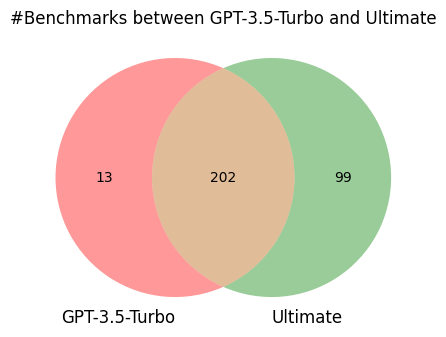

In [50]:
_ = plt.figure(figsize=(5, 5))
venn2_unweighted([set_gpt_35, set_ultimate], ("GPT-3.5-Turbo", "Ultimate"))
plt.title("#Benchmarks between GPT-3.5-Turbo and Ultimate")
plt.show()

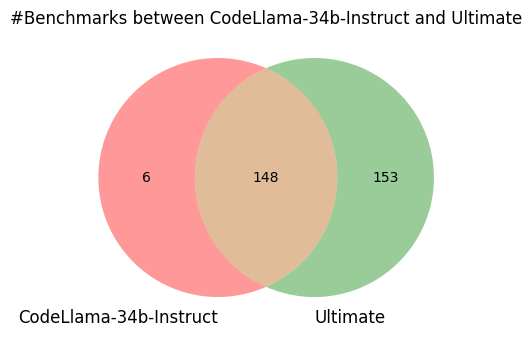

In [49]:
_ = plt.figure(figsize=(5, 5))
venn2_unweighted([set_codellama, set_ultimate], ("CodeLlama-34b-Instruct", "Ultimate"))
plt.title("#Benchmarks between CodeLlama-34b-Instruct and Ultimate")
plt.show()

In [ ]:

venn3_unweighted([set_wn, set_gpt_35, set_codellama], ("GPT-4", "GPT-3.5-Turbo", "CodeLlama-34b-Instruct"))
plt.title("Number of benchmarks verified using different models")
plt.savefig("graphs/llm_comparison_venn.png")
plt.show()

In [109]:
set(gpt_35).difference(set(wn))

{'../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/VeriMAP/TRACER-testloop17_VeriMAP_true.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-lit/gj2007b_true-unreach-call_true-termination.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-new/count_by_nondet_true-unreach-call_true-termination.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/loops/loop-new/half_true-unreach-call_true-termination.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/04.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/22.c',
 '../new_benchmarks/original_benchmarks/LinearArbitrary-SeaHorn/pie/hola/35.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/cav/20.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/cav/35.c',
 '../new_benchmarks/original_benchmarks/accelerating_invariant_generation/svcomp/sum01_true.c',
 '..